In [1]:
import numpy as np
from scipy.stats import norm

%matplotlib inline
import matplotlib.pyplot as plt

# change plotting defaults
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}
plt.rcParams['figure.figsize'] = (16, 10)

**Problem 2c**
c) Graph the Gamow peak versus particle energy E (in keV), and on the same graph plot the Gaussian approximation (same peak value and half-width ∆)

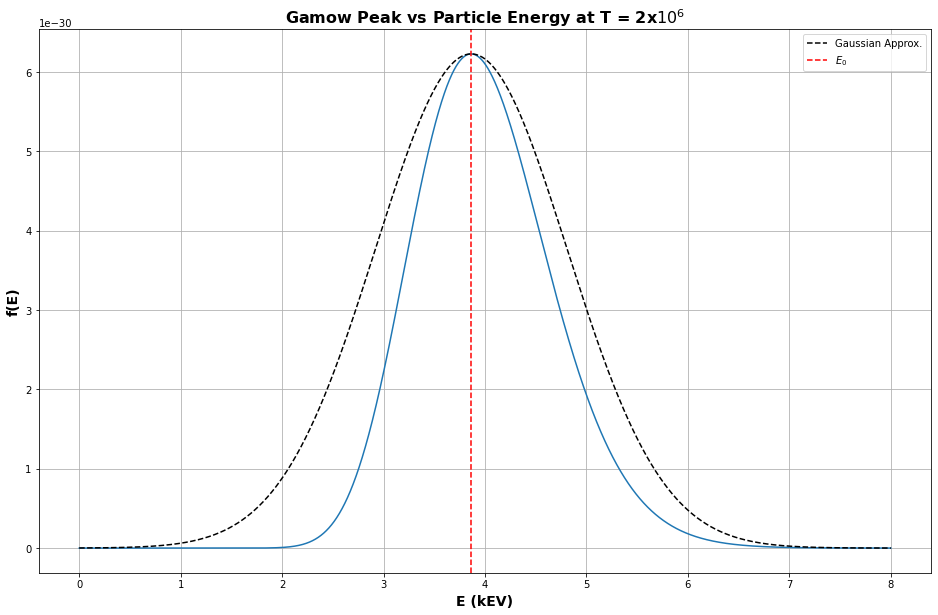

In [9]:
Z_Li = 3
Z_H = 1
A1 = 7.01600343426 #u
A2 = 1.007825031898 #u
A = (A1*A2)/(A1 + A2) #reduced mass in u
T = 2e6 #K
k = (1.380650e-16)*(1/1.6021765e-12)*(1e-3) #erg K^-1 Boltzmann's constant, converted to keV K^-1
b = 31.29*Z_Li*Z_H*(A**(1/2))

E = np.linspace(0.001, 8, 100000) #keV
f_E = np.exp(-((E)/(k*T)) - (b/(E**(1/2))))

#Gaussian approx
mu = 3.864
y = norm.pdf(E, mu, np.sqrt(mu))

def Gaussian(x, a, x0, sigma):
    g = a*np.exp(-((x-x0)**2)/(2*sigma**2))
    return g

params = np.max(f_E), 3.865, 0.9424 #maximum f(E) value, E_0, and half-width of delta

x_fit = np.linspace(0, 8, 100000)
y_fit = Gaussian(E, params[0], params[1], params[2])

plt.plot(E, f_E)
plt.plot(x_fit, y_fit, c='k', ls='--', label='Gaussian Approx.')
plt.axvline(3.864, c='red', ls='--', label=r'$E_{0}$')
plt.xlabel('E (kEV)')
plt.ylabel('f(E)')
plt.title(r'Gamow Peak vs Particle Energy at T = 2x$10^{6}$')
plt.legend()
plt.grid();

In [12]:
peak0 = E[np.argmax(f_E)] 
print('The Gamow peak energy comes out to be {:.3f} kEV.'.format(peak0))

The Gamow peak energy comes out to be 3.863 kEV.


**Problem 3** Burning Lines

In [13]:
#using solar abundances from previous HW 3. Data from Asplund et al. (2009, ARAA, 47, 481)
def mass_frac(M, N):
    N_EH = 10**(N-12.0)
    m = M*N_EH
    return m

#in order is H, He, O, C, Ne, N, Mg, Si. Top 8 elements
A_E = np.array([12.0, 10.93, 8.69, 8.43, 7.93, 7.83, 7.60, 7.51])
M = np.array([1.00784, 4.002602, 15.999, 12.0107, 20.1797, 14.0067, 24.305, 28.0855])

mass_frac(M, A_E)

array([1.00784000e+00, 3.40676681e-01, 7.83597133e-03, 3.23272171e-03,
       1.71757103e-03, 9.46969141e-04, 9.67599478e-04, 9.08828965e-04])

In [14]:
total_el = mass_frac(M, A_E)#total of all 8 elements including H and He
elementZ = total_el[2:] #only metals of the 8 chosen elements (excluding H and He)
elementH = total_el[0] #only hydrogen
elementHe = total_el[1] #only helium

X = np.sum(elementH)/np.sum(total_el)
Y = np.sum(elementHe)/np.sum(total_el)
Z = np.sum(elementZ)/np.sum(total_el)

print('The mass fractions of top 8 elements in the solar photosphere:')
print('X = {:.5f}'.format(X))
print('Y = {:.5f}'.format(Y))
print('Z = {:.5f}'.format(Z))

The mass fractions of top 8 elements in the solar photosphere:
X = 0.73882
Y = 0.24974
Z = 0.01144


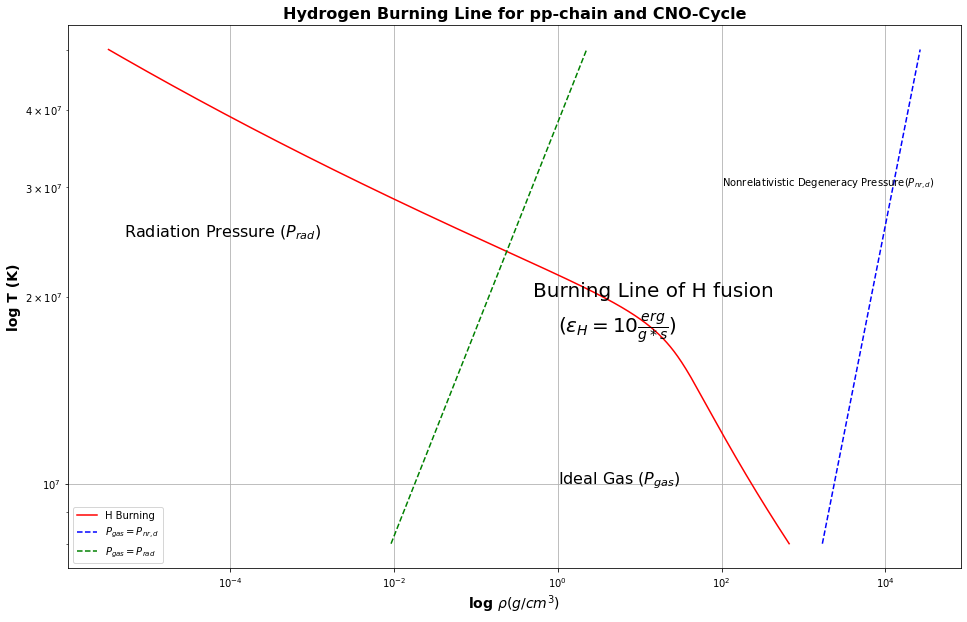

In [48]:
T_0 = np.linspace(8e6, 5e7, 100000)
T = (T_0)/(1e6) #for T_6 = T/10^6 K

#energy generation without rho
e_pp_rho = (2.4e6) * (X**2) * (T**(-2/3)) *np.exp(-33.80/(T**(1/3))) #pp-chain
e_CNO_rho = (4.4e27)*X*Z*(T**(-2/3))*np.exp(-152.299/(T**(1/3))) #CNO-cycle

rho = 10/(e_pp_rho + e_CNO_rho)

rho_id_Nd = 10**((3/2)*(np.log10(T_0)-4.75))
u = ((2*X) + ((3/4)*Y) + (2*Z))**(-1)
rho_id_rad = ((7.565e-15*u)/(3*8.3e7))*(T_0**3)

plt.plot(rho, T_0, c='red', label='H Burning')
plt.xscale('log')
plt.yscale('log')
plt.plot(rho_id_Nd, T_0, c='b', ls='--', label=r'$P_{gas}=P_{nr,d}$')
plt.text(5e-6, 2.5e7, r'Radiation Pressure ($P_{rad}$)', size=16)
plt.plot(rho_id_rad, T_0, c='g', ls='--', label=r'$P_{gas}=P_{rad}$')
plt.text(1, 1e7, r'Ideal Gas ($P_{gas}$)', size=16)
plt.text(1e2, 3e7, r'Nonrelativistic Degeneracy Pressure($P_{nr,d}$)', size=10)
plt.text(0.5, 2e7, r'Burning Line of H fusion', size=20)
plt.text(1, 1.75e7, r'($\epsilon_{H}=10 \frac{erg}{g*s}$)', size=20)
plt.title('Hydrogen Burning Line for pp-chain and CNO-Cycle')
plt.ylabel('log T (K)')
plt.xlabel(r'log $\rho (g/cm^{3})$')
plt.legend()
plt.grid();

Based on hydrogen burning in stars at temperatures ranging between 8 × $10^6$ K and 5.0 × $10^7$ K, appears the burning line at $\epsilon_{H}$ = 10 erg $g^{-1}$ $s^{-1}$ occurs in the radiation pressure and ideal gas regions. It does not react to nonrelativisitc degeneracy pressure until it's less than 8 × $10^6$ K. In the radiation pressure, the burning line remains a constant line in a downward slope as density increases. In the ideal gas range, between 1~100 g $cm^{-3}$, the burning line has a dip in the slope and begins to decrease faster as the temperature decreases. 